In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%load_ext tensorboard


# Classification

In [2]:
(train_images, train_labels), (test_images,
                               test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


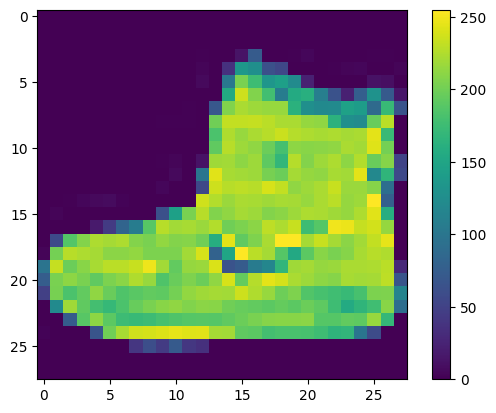

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0


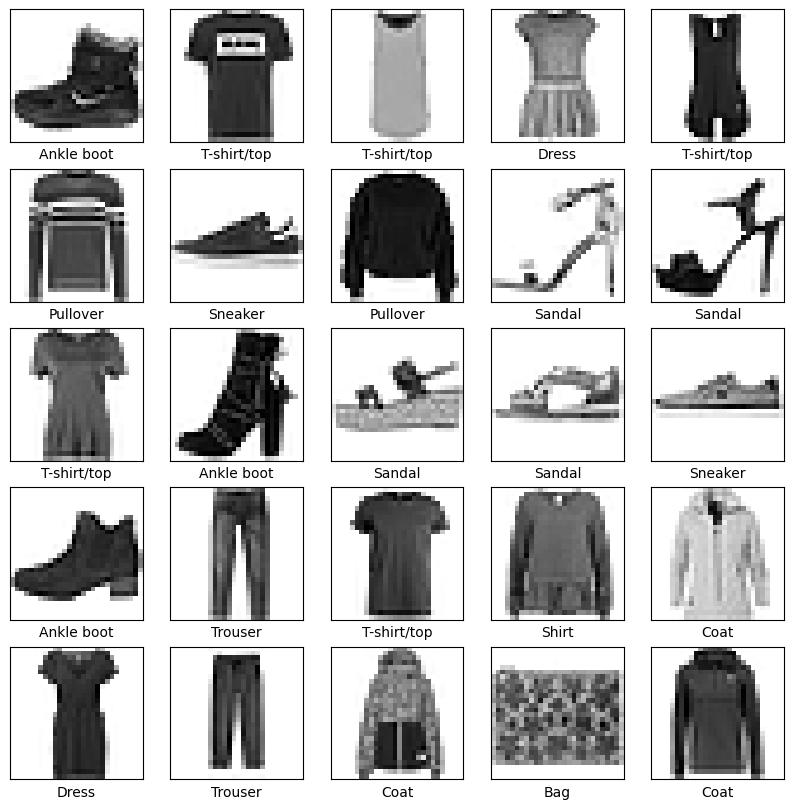

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [6]:
sequential_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

sequential_model.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(
                             from_logits=True),
                         metrics=['accuracy'])


In [7]:
log_dir = "logs/fit/classification/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)


In [8]:
sequential_model.fit(train_images, train_labels, epochs=10,
                     callbacks=[tensorboard_callback])


Epoch 1/10
1875/1875 [==============================] - 2s 965us/step - loss: 0.5021 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.3777 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.3395 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.3142 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.2952 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.2785 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.2671 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.2553 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.2463 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 2s 889u

In [9]:
%tensorboard --logdir logs/fit/classification

In [10]:
test_loss, test_acc = sequential_model.evaluate(
    test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3313 - accuracy: 0.8854 - 237ms/epoch - 758us/step

Test accuracy: 0.8853999972343445


In [11]:
probability_model = tf.keras.Sequential([sequential_model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print(predictions[0])


313/313 [==============================] - 0s 466us/step
[3.9767829e-06 9.7280690e-07 3.3567531e-07 5.5196972e-07 1.5092539e-04
 3.5507067e-03 2.6888058e-05 1.3503899e-01 2.5615043e-06 8.6122411e-01]


In [12]:
np.argmax(predictions[0])


9

In [13]:
test_labels[0]


9

In [14]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


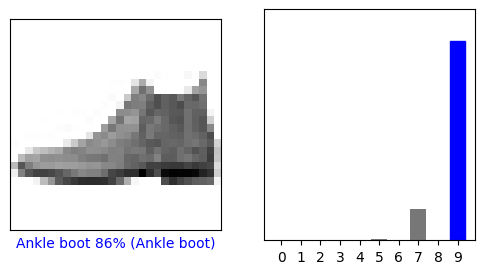

In [15]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


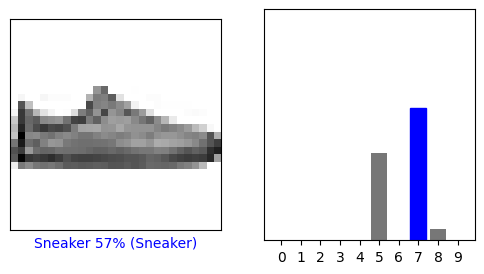

In [16]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


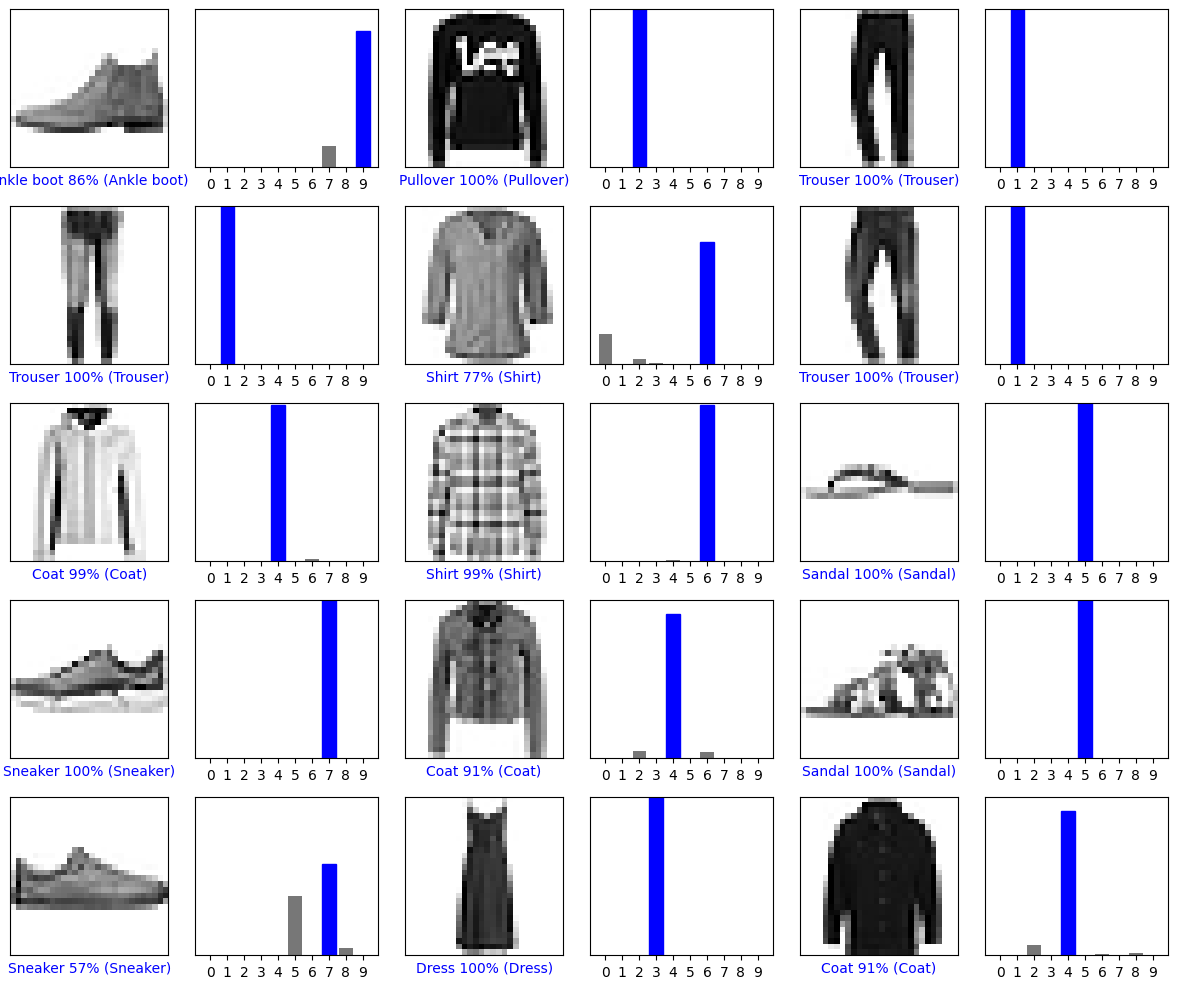

In [17]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [18]:
img = test_images[1]

print(img.shape)


(28, 28)


In [19]:
img = (np.expand_dims(img, 0))

print(img.shape)


(1, 28, 28)


In [20]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 14ms/step
[[1.2940231e-04 4.9698865e-12 9.9864095e-01 3.2074770e-09 8.9175353e-04
  3.3788581e-17 3.3790481e-04 4.8514898e-24 7.6091347e-09 4.1515189e-17]]


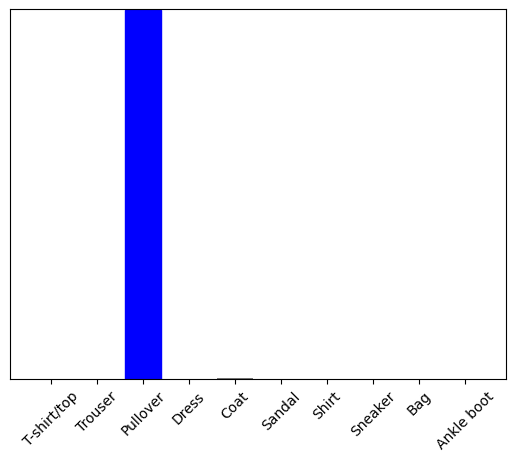

In [21]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [22]:
np.argmax(predictions_single[0])

2

# Regression

In [23]:
np.set_printoptions(precision=3, suppress=True)

In [24]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [25]:
dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [26]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [27]:
dataset = dataset.dropna()


In [28]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [29]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='', dtype=int)
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [30]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


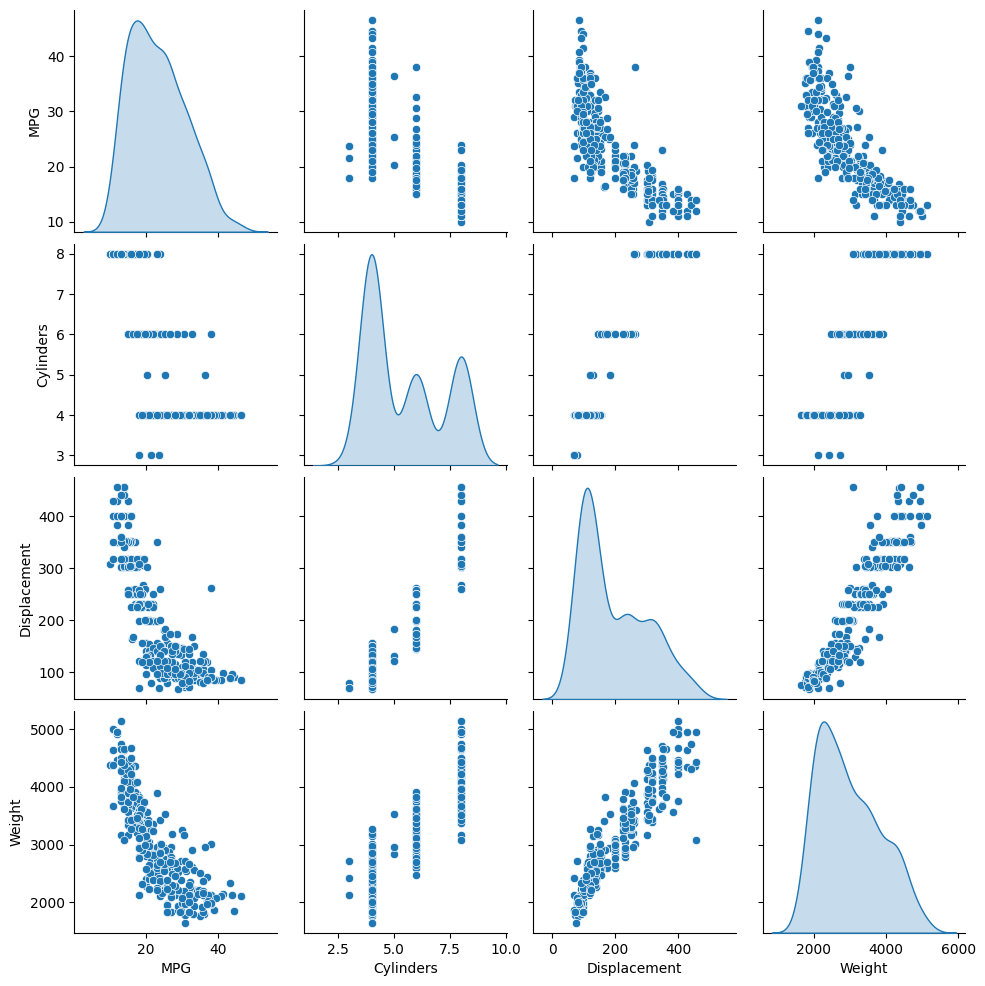

In [31]:
sns.pairplot(
    train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [32]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [33]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


In [34]:
train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [35]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features).astype(np.float32))
print(normalizer.mean.numpy())


[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [36]:
first = np.array(train_features[:1]).astype(np.float32)

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())


First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [37]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1, ], axis=None)
horsepower_normalizer.adapt(horsepower)

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [38]:
horsepower_model.predict(horsepower[:10])


1/1 [==============================] - 0s 24ms/step


array([[ 0.315],
       [ 0.178],
       [-0.581],
       [ 0.441],
       [ 0.399],
       [ 0.157],
       [ 0.473],
       [ 0.399],
       [ 0.104],
       [ 0.178]], dtype=float32)

In [39]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [40]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


CPU times: total: 656 ms
Wall time: 2.03 s


In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,val_loss,epoch
95,3.802949,4.193449,95
96,3.802978,4.189206,96
97,3.803584,4.193372,97
98,3.803807,4.180663,98
99,3.802554,4.188320,99


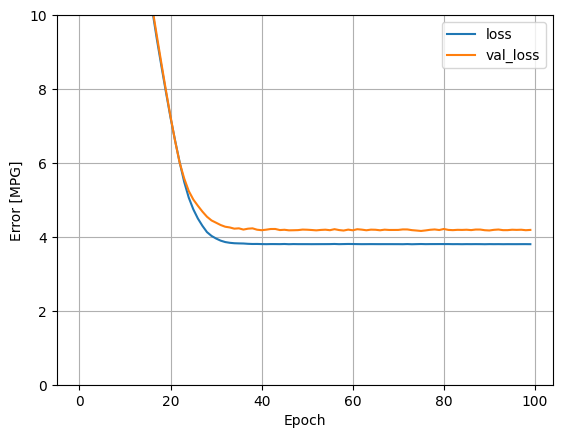

In [42]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)


plot_loss(history)


In [43]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)


In [44]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 571us/step


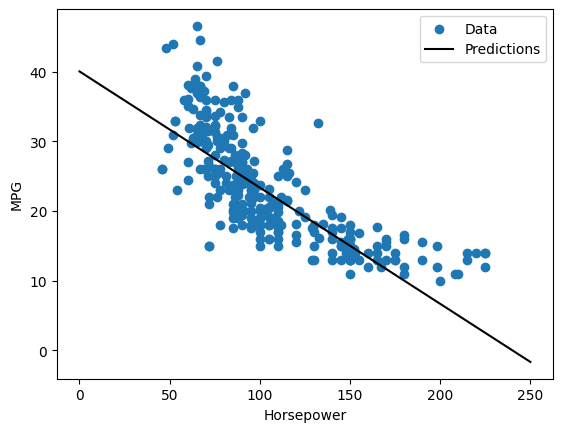

In [45]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()


plot_horsepower(x, y)


In [46]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [47]:
linear_model.predict(train_features[:10])


1/1 [==============================] - 0s 24ms/step


array([[-0.628],
       [-0.17 ],
       [ 0.631],
       [-1.707],
       [-0.213],
       [-0.101],
       [-0.145],
       [ 1.058],
       [ 0.146],
       [ 1.185]], dtype=float32)

In [48]:
linear_model.layers[1].kernel


<tf.Variable 'dense_3/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.454],
       [ 0.475],
       [ 0.319],
       [ 0.144],
       [ 0.671],
       [-0.502],
       [-0.293],
       [-0.281],
       [-0.548]], dtype=float32)>

In [49]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [50]:
log_dir_reg_mul = "logs/fit/regression/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_reg_mul = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir_reg_mul, histogram_freq=1)

In [51]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split=0.2,
    callbacks=[tensorboard_callback_reg_mul])


CPU times: total: 859 ms
Wall time: 4.2 s


In [52]:
%tensorboard --logdir logs/fit/regression

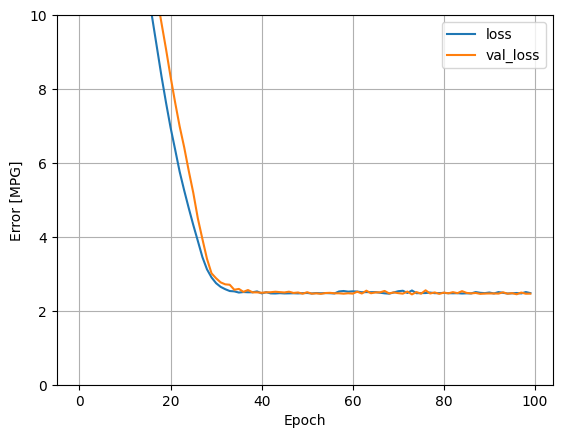

In [53]:
plot_loss(history)


In [54]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)


In [55]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model


In [56]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [57]:
log_dir_reg_dnn = "logs/fit/dnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_reg_dnn = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir_reg_mul, histogram_freq=1)

In [58]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100,
    callbacks=[tensorboard_callback_reg_dnn])


CPU times: total: 1.14 s
Wall time: 4.96 s


In [59]:
%tensorboard --logdir logs/fit/dnn

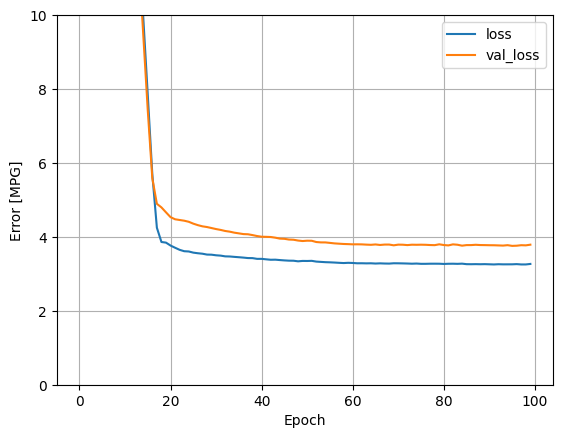

In [60]:
plot_loss(history)


In [61]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)


8/8 [==============================] - 0s 570us/step


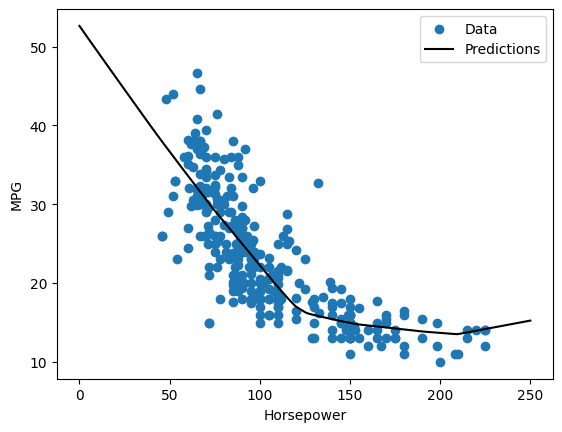

In [62]:
plot_horsepower(x, y)


In [63]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)


In [64]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 64)                640       
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [65]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)


CPU times: total: 172 ms
Wall time: 2.19 s


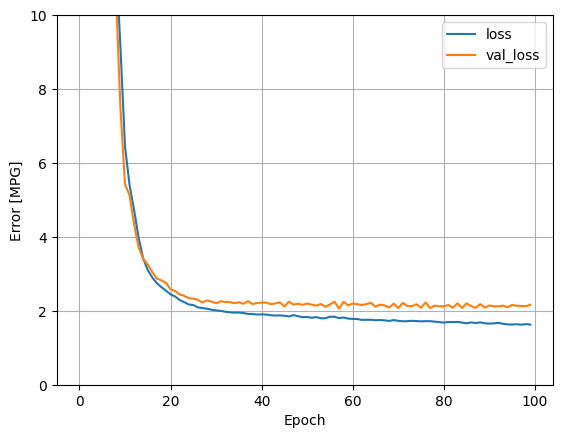

In [66]:
plot_loss(history)


In [67]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features, test_labels, verbose=0)


In [68]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T


,Mean absolute error [MPG]
horsepower_model,3.652611
linear_model,2.529188
dnn_horsepower_model,2.892141
dnn_model,1.684455


3/3 [==============================] - 0s 500us/step


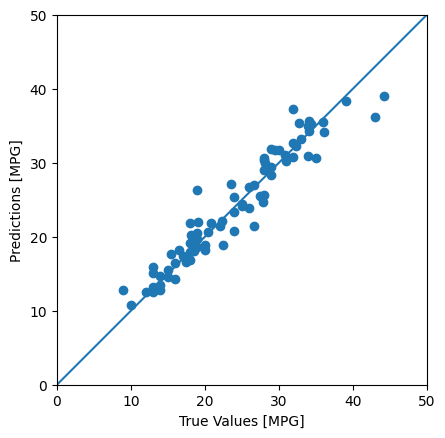

In [69]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


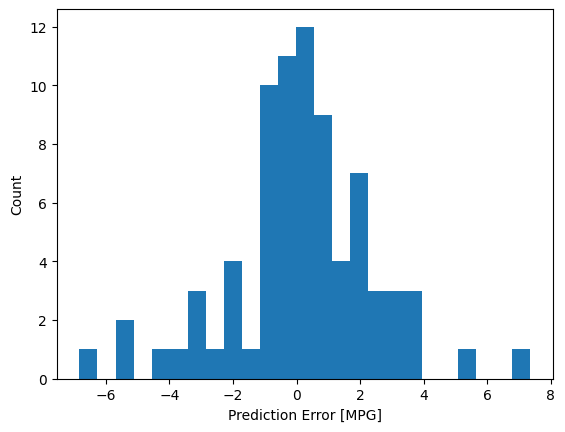

In [70]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')


In [71]:
dnn_model.save('dnn_model')


TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)


In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T


,Mean absolute error [MPG]
horsepower_model,3.644282
linear_model,2.529232
dnn_horsepower_model,2.849209
dnn_model,1.715707
reloaded,1.715707
